In [4]:
import torch
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [38]:
means = defaultdict(list)
stds = defaultdict(list)
n_layers = 12


for layer in range(n_layers):
    with open(f'../cruft/layer_{layer}_corrs.json') as f:
        corrs = json.load(f)

    for k, token_dict in corrs.items():
        s = torch.stack([torch.tensor(t) for t in token_dict]).mean(dim=0)
        means[k].append(s.mean().item())
        stds[k].append(s.std().item())


# ranks is a new deep copy of means

ranks = {k: [0] * n_layers for k in means}
for layer in range(n_layers):
    layer_means = {k: means[k][layer] for k in means}
    # Sort keys by their mean correlation scores
    sorted_keys = sorted(layer_means, key=layer_means.get, reverse=True)
    # Assign rank based on sorted order
    r = {key: rank for rank, key in enumerate(sorted_keys, 1)}

    # Update the means dictionary with ranks
    for k in r:
        ranks[k][layer] = r[k]

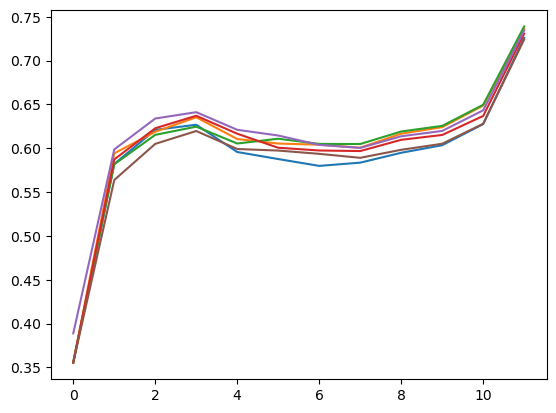

In [45]:
for k in means.keys():
    plt.plot(list(range(n_layers)), means[k], label=k)


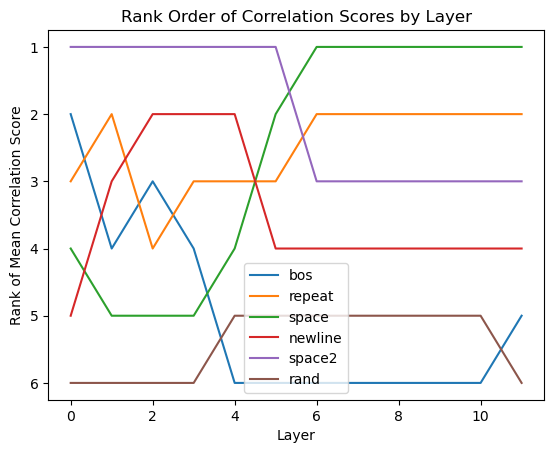

In [42]:
for k in ranks.keys():
    plt.plot(list(range(n_layers)), ranks[k], label=k)

plt.gca().invert_yaxis()
plt.xlabel('Layer')
plt.ylabel('Rank of Mean Correlation Score')
plt.title('Rank Order of Correlation Scores by Layer')
plt.legend()
plt.show()

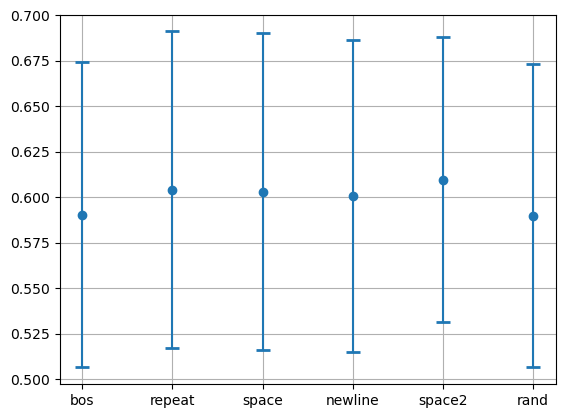

In [47]:
mean_means = {k: torch.tensor(v).mean() for k, v in means.items()}
mean_stds = {k: torch.tensor(v).std() for k, v in means.items()}

plt.errorbar(list(mean_means.keys()), list(mean_means.values()), yerr=list(mean_stds.values()), fmt='o', capsize=5, capthick=2, label=k)
plt.grid()

In [7]:
layer = 11
with open(f'../cruft/layer_{layer}_corrs.json') as f:
    corrs = json.load(f)

bos torch.Size([1024]) tensor(0.7259) tensor(0.0343)
repeat torch.Size([1024]) tensor(0.7361) tensor(0.0334)
space torch.Size([1024]) tensor(0.7389) tensor(0.0331)
newline torch.Size([1024]) tensor(0.7308) tensor(0.0339)
space2 torch.Size([1024]) tensor(0.7344) tensor(0.0329)
rand torch.Size([1024]) tensor(0.7242) tensor(0.0334)


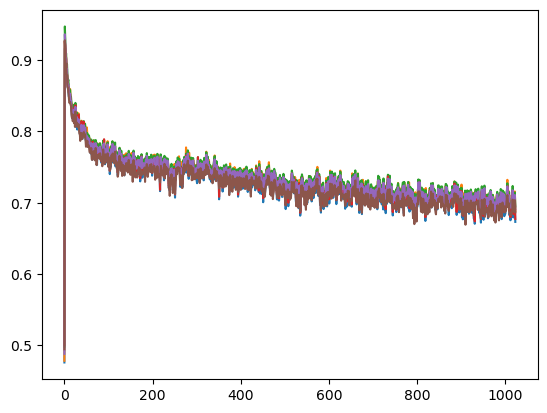

In [8]:
for k, token_dict in corrs.items():
    s = torch.stack([torch.tensor(t) for t in token_dict]).mean(dim=0)
    print(k, s.shape, s.mean(), s.std())
    plt.plot(s, label=k)

bos torch.Size([1024]) tensor(0.7259) tensor(0.0341)
repeat torch.Size([1024]) tensor(0.7369) tensor(0.0330)
space torch.Size([1024]) tensor(0.7393) tensor(0.0333)
newline torch.Size([1024]) tensor(0.7314) tensor(0.0337)
space2 torch.Size([1024]) tensor(0.7347) tensor(0.0331)
rand torch.Size([1024]) tensor(0.7245) tensor(0.0340)


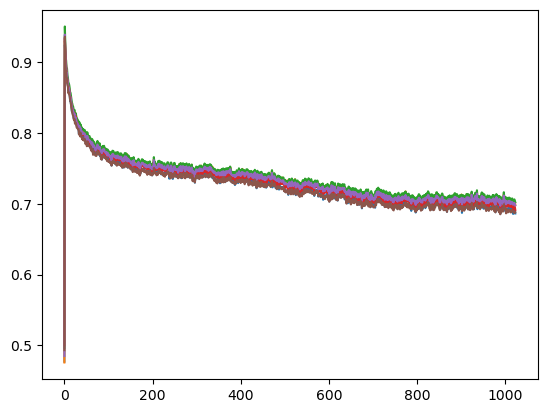

In [6]:
for k, token_dict in corrs.items():
    s = torch.stack([torch.tensor(t) for t in token_dict]).mean(dim=0)
    print(k, s.shape, s.mean(), s.std())
    plt.plot(s, label=k)